In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/My\ Drive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nareshbhat/health-care-data-set-on-heart-attack-possibility
!unzip -o health-care-data-set-on-heart-attack-possibility.zip

Dataset URL: https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility
License(s): unknown
  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 6.73MB/s]
Archive:  health-care-data-set-on-heart-attack-possibility.zip
  inflating: heart.csv               


In [ ]:
df = pd.read_csv("heart.csv")
df = (df - df.min()) / (df.max() - df.min())
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


In [ ]:
y = df['target']

df.drop(columns=['target'], inplace=True)

X_train = df.sample(frac=0.8, random_state=42)
X_test = df.drop(X_train.index)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train = y[X_train.index]
y_test = y[X_test.index]

# **Loss Function to minimize:**
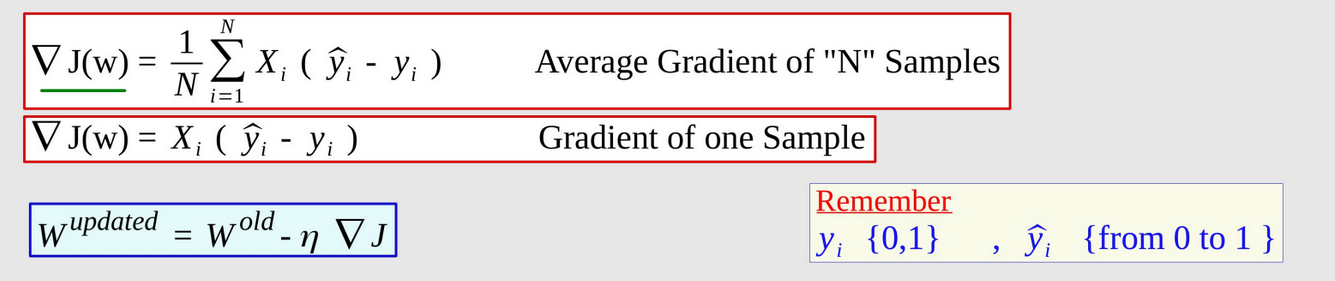

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=100):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for i in range(self.iterations):
            predictions = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(predictions)

            self.weights -= self.learning_rate * (1 / X.shape[0]) * np.dot(X.T, (predictions - y))

    def predict(self, X):
        predictions = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(predictions)
        return np.round(predictions)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def precision(self, y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        predicted_positives = np.sum(y_pred == 1)
        return true_positives / predicted_positives

    def recall(self, y_true, y_pred):
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        actual_positives = np.sum(y_true == 1)
        return true_positives / actual_positives

    def f1_score(self, y_true, y_pred):
        prec = self.precision(y_true, y_pred)
        rec = self.recall(y_true, y_pred)
        return 2 * (prec * rec) / (prec + rec)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

test_predictions = model.predict(X_test)

test_accuracy = model.accuracy(y_test, test_predictions)
test_precision = model.precision(y_test, test_predictions)
test_recall = model.recall(y_test, test_predictions)
test_f1 = model.f1_score(y_test, test_predictions)

print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1-score:", test_f1)

Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1-score: 1.0


# **Discussion**



*   there were no missing values
*   there were no categorical that needed encoding
*   there were no challenges in data cleaning nor model implementation
*   the model is perfect for this test data because of it's perfect accuracy,precision, recall and F1-score

